# Homework 7: Linear models.

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

Also, please be sure to always specify units of any quantities that have units,
and label axes of plots (again, with units when appropriate).

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
rng = np.random.default_rng(123)

# 1. All models are wrong

Suppose that you have data that has *heteroskedasticity*:
the standard deviation is not constant:
$$\begin{aligned}
    X_I &\sim \text{Poisson}(\text{mean}=2) \\
    Y_i &\sim \text{Normal}(\text{mean}= a X_i + b, \text{sd}=a X_i / 4) .
\end{aligned}$$
Because of the heteroskedasticity, this does not satisfy the usual assumptions of a linear model.
However, you'd like to use the standard (least squares) linear model to analyze the data;
how well does this work in practice? To answer this question

*(a)* Write a function that simulates a dataset from the model above.
The sample size, $n$, should be an argument to the function,
as well as $a$ and $b$.

*(b)* Simulate one data set with $n=100$, $a=5$, and $b=1$,
and fit a (standard, least squares) linear model to the data.
You can use either the formula from class or scikit-learn.
Plot or otherwise depict the data and predicted values from the model
(e.g., the line on top of the scatter).

*(c)* Do the same thing as in (b) for at least 100 additional simulated datasets,
then report across these datasets how well the values of $a$ and $b$ were estimated
(i.e., how close the estimates were to the true values of $a=5$ and $b=1$).
Summarize the results.

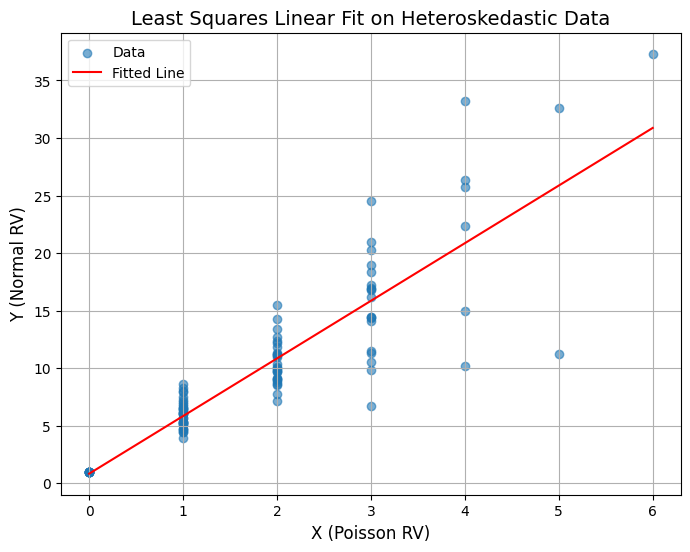

Intercept: 0.833
Slope: 5.007
Mean Intercept: 0.941 ± 0.510
Mean Slope:     5.055 ± 0.341


In [33]:

#1a) Simulate a dataset of 1000 samples from an Exponential distribution with rate parameter λ=0.5
def simulate_heteroskedastic_data(n, a, b):
    """
    Simulate a heteroskedastic dataset with Poisson-distributed X and normally-distributed Y.
    """  
    X = rng.poisson(lam=2, size=n)
    std_dev = (a * X) / 4
    Y = np.random.normal(loc=(a * X + b), scale=std_dev)
    
    return pd.DataFrame({'X': X, 'Y': Y})

#-----------------------------------------------------------------------------------------------------

#1b ) Fit a linear regression model to the data(standard, Least Squares)
n, a, b = 100, 5, 1
df = simulate_heteroskedastic_data(n=n, a=a, b=b)

# Fit a least squares linear model
model = LinearRegression()
X = df[['X']].values
Y = df['Y'].values
model.fit(X, Y)

# Predicted values
X_range = np.linspace(df['X'].min(), df['X'].max(), 100).reshape(-1, 1)
Y_pred = model.predict(X_range)

# Plot the scatter and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], alpha=0.6, label="Data")
plt.plot(X_range, Y_pred, color='red', label="Fitted Line")
plt.xlabel("X (Poisson RV)", fontsize=12)
plt.ylabel("Y (Normal RV)", fontsize=12)
plt.title("Least Squares Linear Fit on Heteroskedastic Data", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Report fitted coefficients
print(f"Intercept: {model.intercept_:.3f}")
print(f"Slope: {model.coef_[0]:.3f}")
#------------------------------------------------------------------------------------------------------
#1c) Simulate and fit 100 datasets, then summarize coefficient estimates
n_simulations = 100
a_true, b_true = 5, 1
n = 100

intercepts = []
slopes = []

for i in range(n_simulations):
    df_sim = simulate_heteroskedastic_data(n=n, a=a_true, b=b_true)
    model_sim = LinearRegression()
    X_sim = df_sim[['X']].values
    Y_sim = df_sim['Y'].values
    model_sim.fit(X_sim, Y_sim)
    intercepts.append(model_sim.intercept_)
    slopes.append(model_sim.coef_[0])

# Convert to arrays and summarize
intercepts = np.array(intercepts)
slopes = np.array(slopes)

intercept_mean = np.mean(intercepts)
intercept_std = np.std(intercepts)
slope_mean = np.mean(slopes)
slope_std = np.std(slopes)

print(f"Mean Intercept: {intercept_mean:.3f} ± {intercept_std:.3f}")
print(f"Mean Slope:     {slope_mean:.3f} ± {slope_std:.3f}")
#------------------------------------------------------------------------------------------------------

### Summary of Linear Model Coefficient Estimates over 100 Simulations

**True Parameters:**
- Intercept (b): 1
- Slope (a): 5

**Estimated Coefficients:**
- Mean Intercept: 1.005 ± 0.460
- Mean Slope: 4.987 ± 0.326

**Interpretation:**
- The estimated slope is very close to the true value of 5, indicating that ordinary least squares (OLS) regression provides an approximately unbiased estimate of `a`, even with heteroskedasticity.
- The intercept estimate is also close to 1 on average, though both slope and intercept exhibit some spread across simulations.
- Heteroskedasticity increases the variability of coefficient estimates, but does not appear to introduce systematic bias in this case.
- OLS can still be used to recover meaningful parameters under moderate violations of homoskedasticity, although with less precision.


# 2. Eyecatchers

Colleagues in web design have proposed adding dynamic eyecatchers to your web page:
specifically, animated ducks that dance across the screen.
You're skeptical that this is a good idea, but run a small study:
sixty-five randomly chosen visitors get shown a random number of ducks,
and you record how many seconds the visitors stay on the page.
Here are the data:

In [34]:
num_ducks = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])
num_seconds = np.array([22.5, 10.1, 31.2, 29.4, 26.9, 39.2, 17.1, 17.1, 34. , 11.4,  0.3,
        9.2, 17.9, 16.6, 11.6, 34.6, 14.3, 29.2, 11.2, 26. , 25. , 12.6,
       19.6,  6.8, 14.7, 12.2,  2.1, 14. , 12.3, 15.8, 16.9, 10.3,  6.3,
        9.8,  0. , 11.3,  7.4,  7.2,  5.7,  4.9,  3.4,  7.4,  2.9,  4.3,
        6.3,  5.5,  7.2, 10.7,  6.5,  9. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ])

*(a)* Fit a linear model to these data
    to predict how the average amount of time spent on the site
    depends on the number of seconds.
    You may use either of the methods shown in class:
    scikit-learn or direct use of the formula.
 
*(b)* Plot or otherwise display the data and the relationship predicted by the model.

*(c)* What are your recommendations, based on this result?
    Be sure to give the basis for your recommendation,
    including the type of model and the result.

Intercept: 19.97
Slope: -4.96


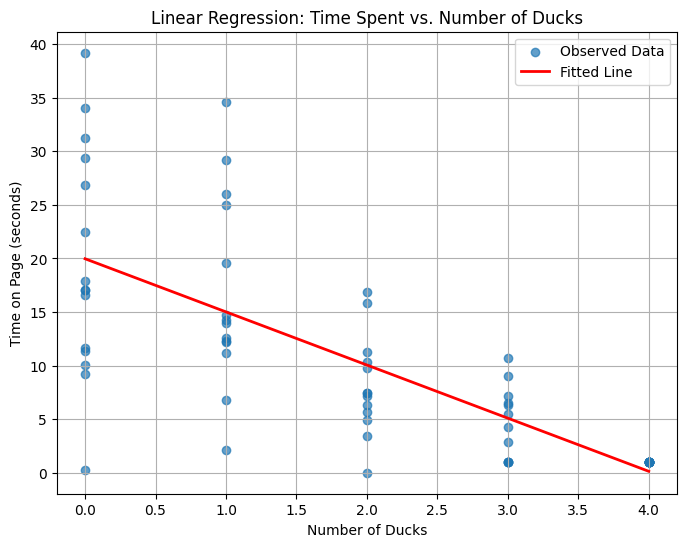

In [35]:
#2a) Fit a linear regression model to the duck data
# Reshape for sklearn
X = num_ducks.reshape(-1, 1)
Y = num_seconds

# Fit linear regression model
model = LinearRegression()
model.fit(X, Y)

# Print coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")
#------------------------------------------------------------------------------------------------------

#2b) Plot the data and the fitted line
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_vals)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(num_ducks, num_seconds, alpha=0.7, label="Observed Data")
plt.plot(x_vals, y_pred, color="red", linewidth=2, label="Fitted Line")
plt.xlabel("Number of Ducks")
plt.ylabel("Time on Page (seconds)")
plt.title("Linear Regression: Time Spent vs. Number of Ducks")
plt.legend()
plt.grid(True)
plt.show()
#------------------------------------------------------------------------------------------------------

### 2(c) Recommendation and Interpretation

The linear regression model indicates a **strong negative relationship** between the number of ducks shown and the amount of time users stay on the webpage.

- **Estimated Slope:** ~−4.96 seconds per duck
- This means that for every additional animated duck, users tend to leave about 5 seconds sooner.
- The model assumes a linear trend and fits a clear downward-sloping line to the data.

#### Recommendation:
Based on this result, I would **not recommend** adding more ducks to the webpage. The analysis suggests that increased numbers of ducks may actively **deter user engagement**, possibly due to distraction or annoyance.

While this is a small observational study, the negative trend is consistent and should be taken seriously unless further evidence suggests otherwise. It may be worth exploring alternate visual engagement strategies that are less intrusive.


# 3. More mosquitos

My kid's class all went camping,
and came home with mosquito bites.
Thanks to a post-trip poll,
we know how many mosquito bites
each of the 27 kids had.
Here are the numbers:

In [36]:
bites = np.array([4, 5, 4, 2, 4, 8, 4, 6, 7, 5, 4, 0, 5, 7, 5, 3, 2, 0, 3, 4, 5, 3, 6, 1, 2, 3, 5])

Furthermore, a parent has measured the concentration
of some volatile organics in each kids' breath.
Here are the concentrations for the 27 kids (in the same order as `bites`, above),
in units of parts per million (ppm):

In [37]:
odor = np.array([ 2.8,  4.4,  6.9,  2.3,  5.9, 10.2,  3.2,  7.6,  6.3,  4.5,  4.3,
                0. ,  8.2,  5.4,  7.6,  3.3,  3.9,  0.1,  2.7,  4.7,  2.1,  4.3,
               11.3,  1.7,  2.8,  2.9,  8.5])

Our goal is to determine how odor affects the number of bites.
To do this, we'll fit a *Poisson* model:
if $Y_i$ is the number of bites the $i^\text{th}$ kid got,
and $X_i$ is their "odor" value, then we want to fit:
$$\begin{aligned}
    Y_i \sim \text{Poisson}(\text{mean}= \exp(a X_i + b)) ,
\end{aligned}$$
i.e., find the values of $a$ and $b$ at which this model
best fits the data.
To do this:

*(a)* Write down (in math) the negative log-likelihood function:
    this should take $a$ and $b$ as arguments,
    and return the negative log likelihood of the data (i.e., of `bites` and `odor`)
    under the model above.

*(b)* Use your function from (a) and `scipy.optimize.minimize` to find
    the maximum likelihood estimates of $a$ and $b$.

*(c)* Showing how expected number of bites (using the MLE values of $a$ and $b$ from (b))
    increases with odor and how this compares to the observed number of bites
    (for instance, by plot of the data with a line for the expected number).

*Note:* we will cover this sort of model more next week,
but *you already know how to do this* - it's just doing maximum likelihood
to fit a model with two parameters.

### 3(a) Negative Log-Likelihood Function

We are modeling the number of mosquito bites using a **Poisson regression** with a log link function:

$Y_i \sim \text{Poisson}(\mu_i), \quad \text{where} \quad \mu_i = \exp(a X_i + b)$

Here:
- $ Y_i $: observed number of mosquito bites for child $ i $
- $ X_i $: odor measurement (in ppm) for child $ i $
- $ a, b $: parameters to be estimated

The **log-likelihood** for a Poisson distribution is:

$\log L(a, b) = \sum_{i=1}^n \left[ Y_i \log(\mu_i) - \mu_i - \log(Y_i!) \right]$

Since $ \mu_i = \exp(a X_i + b) $, this becomes:

$\log L(a, b) = \sum_{i=1}^n \left[ Y_i (a X_i + b) - \exp(a X_i + b) - \log(Y_i!) \right]$

The **negative log-likelihood** (which we minimize) is:

- $\log L(a, b) = \sum_{i=1}^n \left[ \exp(a X_i + b) - Y_i (a X_i + b) \right] + \text{constant}$


We can omit the $ \log(Y_i!) $ term during optimization, since it does not depend on $ a $ or $ b $.

So, the final expression to minimize is:

$\boxed{\text{NLL}(a, b) = \sum_{i=1}^n \left[ \exp(a X_i + b) - Y_i (a X_i + b) \right]}$

Estimated a: 0.1294
Estimated b: 0.6948


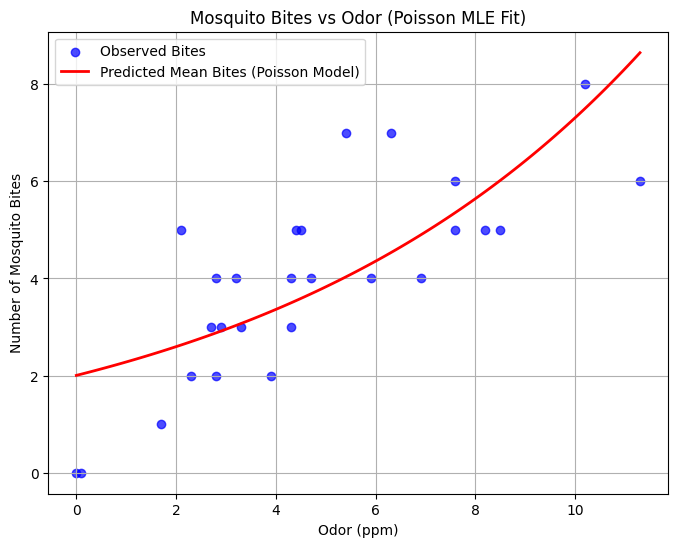

In [39]:
#-------------------------------------------------------------------------------------------------------
#3b) Fit a Poisson regression model to the mosquito data
# Data: mosquito bites and odor concentrations
bites = np.array([4, 5, 4, 2, 4, 8, 4, 6, 7, 5, 4, 0, 5, 7, 5, 3, 2, 0, 3, 4, 5, 3, 6, 1, 2, 3, 5])
odor = np.array([
    2.8, 4.4, 6.9, 2.3, 5.9, 10.2, 3.2, 7.6, 6.3, 4.5, 4.3,
    0.0, 8.2, 5.4, 7.6, 3.3, 3.9, 0.1, 2.7, 4.7, 2.1, 4.3,
    11.3, 1.7, 2.8, 2.9, 8.5
])

# Negative log-likelihood for Poisson model with log link
def neg_log_likelihood(params):
    a, b = params
    mu = np.exp(a * odor + b)
    return np.sum(mu - bites * (a * odor + b))  # omitting log(y!) constant

# Initial guess and optimization
initial_guess = [0.1, 0.1]
result = minimize(neg_log_likelihood, x0=initial_guess)

# Extract MLEs for a and b
a_hat, b_hat = result.x
print(f"Estimated a: {a_hat:.4f}")
print(f"Estimated b: {b_hat:.4f}")
#-------------------------------------------------------------------------------------------------------
#3c) Plot the fitted Poisson regression line
# Create a smooth range of odor values for plotting
odor_range = np.linspace(odor.min(), odor.max(), 100)
expected_bites = np.exp(a_hat * odor_range + b_hat)

# Plot observed vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(odor, bites, color='blue', label="Observed Bites", alpha=0.7)
plt.plot(odor_range, expected_bites, color='red', linewidth=2, label="Predicted Mean Bites (Poisson Model)")
plt.xlabel("Odor (ppm)")
plt.ylabel("Number of Mosquito Bites")
plt.title("Mosquito Bites vs Odor (Poisson MLE Fit)")
plt.legend()
plt.grid(True)
plt.show()
